In [18]:
import numpy as np
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
nf_movie_dict = {}
with open('/home/steich/NF_Prize_Data/data/movie_titles.csv', 'r', encoding="ISO-8859-1") as iFile:
    for line in iFile:
        line = line.split(',')
        line[2] = line[2].replace('\n', '')
        nf_movie_dict[line[2]] = [line[0], line[1]]

In [8]:
nf_movie_dict

{'The Twilight Zone: Vol. 39': ['1856', '1960'],
 'UFO': ['9384', '1970'],
 "Singin' in the Rain": ['2360', '1952'],
 'National Geographic: Killer Wave: Power of the Tsunami': ['13834', '1997'],
 'They Call Me Sirr': ['16723', '2001'],
 'Never Talk to Strangers': ['10172', '1995'],
 "Jesus' Son": ['6796', '2000'],
 'David Copperfield': ['1911', '1999'],
 "Tony Hawk's Trick Tips: Vol. 2: Essentials of Street": ['12555', '2001'],
 'Sherlock Holmes: The Woman in Green': ['16729', '1945'],
 'Pink Panther Cartoon Collection: Jet Pink': ['4725', '1997'],
 'The Million Dollar Hotel': ['15260', '2001'],
 'String Cheese Incident: Live at the Fillmore': ['917', '2003'],
 'Clean Slate': ['4913', '1994'],
 'The Fabulous Story of the Cuban Cigar': ['11379', '1999'],
 'Chaplin: The Collection: Vol. 5': ['12657', '1919'],
 'Fight Club: Bonus Material': ['673', '1999'],
 'The Peter Rabbit Collection: The Tale of the Flopsy Bunnies and Mrs. Tittlemouse / The Tale of Pigling Bland': ['7066',
  '2001'],


In [11]:
imdb_embeddings = {}
with open('/home/steich/NF_Prize_Data/data/movie_embeddings2.txt', 'r') as iFile:
    for line in iFile:
        line = line.replace('\n', '')
        line = line.split('\t')
        imdb_embeddings[line[0]] = np.array([float(i) for i in line[1:]])

In [12]:
imdb_embeddings

{"Sky Shorts Trygve Wakenshaw's Christmas": array([ 0.06388424, -0.01225238,  0.15067148,  0.14820315,  0.07761691,
         0.02313403,  0.08286615,  0.20269519,  0.19653295,  0.02278721,
         0.0991949 , -0.10296364, -0.2512915 ,  0.07094932,  0.01230109,
         0.12749735,  0.17640264, -0.08047019,  0.28347492,  0.14797477,
         0.09269862, -0.02906898,  0.04306074,  0.10924394, -0.0990965 ,
         0.02497904, -0.01509837,  0.02994658,  0.08767095, -0.02348554,
         0.00944897, -0.15072374, -0.07093821, -0.0136112 ,  0.08827369,
        -0.05350567,  0.08874334, -0.2943354 ,  0.03001027,  0.02018103,
         0.07269543,  0.24057402, -0.05260623,  0.15804777, -0.05980321,
         0.01447854,  0.06663732, -0.00389732, -0.04764057,  0.26953027,
         0.0665502 ,  0.09702762,  0.26721078,  0.18827629, -0.20758452,
        -0.00820066,  0.07250276, -0.11954792,  0.01942997,  0.09519766,
        -0.04502568, -0.16785777,  0.17128703, -0.09269576]),
 'La Tregua': array

In [15]:
combined_embeddings = {}
for key in nf_movie_dict.keys():
    if key in imdb_embeddings.keys():
        combined_embeddings[nf_movie_dict[key][0]] = [key, imdb_embeddings[key]]

In [17]:
len(combined_embeddings)

11342

In [19]:
len(nf_movie_dict)

17297

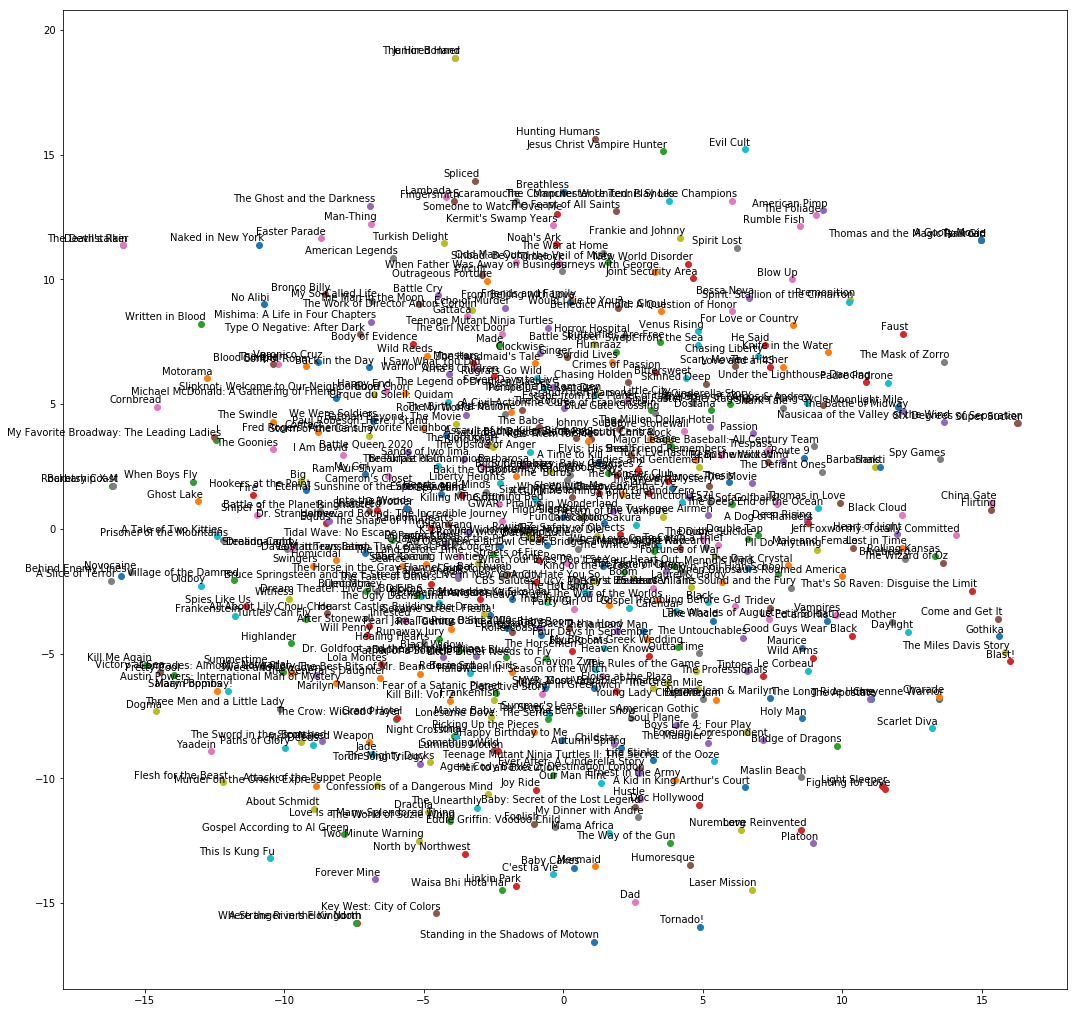

In [21]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
sample = random.sample([k for k in combined_embeddings.keys()], 500)
low_dim_embs = tsne.fit_transform([combined_embeddings[i][1] for i in sample])
labels = [combined_embeddings[i][0] for i in sample]
plt.figure(figsize=(18,18))
for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x,y)
    plt.annotate(label,
                    xy=(x, y),
                    xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.savefig("/home/steich/NF_Prize_Data/data/tsne_movie_embeddings4.png")
plt.show()